In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import evaluation
import pandas as pd
import os
import visualization as vis
import mir_eval
from glob import glob
import numpy as np
import datasets

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

experiments_dir = "../../tera/bakalarka/experimenty/models-bittner-plugandplay/"

from common_jupyter import *

/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3

In [5]:
attr_names = ["HCL", "parameters"]
all_data = ld(attr_names, [str, int], "bittner-bs8-cm\d*(-us2-os3|)-p(\d*)", experiments_dir, verbose=True, results_dir="model-f0-outputs")
all_data.HCL = all_data.HCL.map({"":"no", "-us2-os3": "yes"})
all_data = all_data[all_data.parameters != 4049]

('0503_144058-bittner-bs8-cm12-p18633', ['', 18633])
('0503_150403-bittner-bs8-cm8-p10253', ['', 10253])
('0503_152202-bittner-bs8-cm4-p4049', ['', 4049])
('1106_171549-bittner-bs8-cm16-p29189', ['', 29189])
('1106_174305-bittner-bs8-cm16-us2-os3-p125709', ['-us2-os3', 125709])
('1106_192615-bittner-bs8-cm20-p41921', ['', 41921])
('1106_195902-bittner-bs8-cm4-us2-os3-p10921', ['-us2-os3', 10921])
('1106_202900-bittner-bs8-cm24-p61873', ['', 61873])
('1106_210722-bittner-bs8-cm6-us2-os3-p20451', ['-us2-os3', 20451])
('1106_215941-bittner-bs8-cm28-p79797', ['', 79797])
('1106_224310-bittner-bs8-cm8-us2-os3-p32701', ['-us2-os3', 32701])
('1106_233638-bittner-bs8-cm32-p106621', ['', 106621])
('1107_002546-bittner-bs8-cm10-us2-os3-p47671', ['-us2-os3', 47671])
('1107_013131-bittner-bs8-cm36-p129737', ['', 129737])
('1107_023136-bittner-bs8-cm12-us2-os3-p65361', ['-us2-os3', 65361])
('1107_034832-bittner-bs8-cm40-p163433', ['', 163433])
('1107_045430-bittner-bs8-cm14-us2-os3-p85771', ['-us2-

    HCL  parameters  Raw Pitch Accuracy  Raw Chroma Accuracy  Overall Accuracy
0    no       10253            0.691717             0.751113          0.620495
1    no       18633            0.692545             0.751456          0.621231
2    no       29189            0.698935             0.754657          0.625321
3    no       41921            0.700307             0.754896          0.628229
4    no       61873            0.701711             0.756747          0.623327
5    no       79797            0.699146             0.754956          0.621099
6    no      106621            0.697860             0.757535          0.623043
7    no      129737            0.700485             0.756715          0.625169
8    no      163433            0.696779             0.754954          0.619808
9    no      191741            0.698697             0.756807          0.621004
10   no      232309            0.704403             0.761221          0.627325
11   no      265809            0.703548             

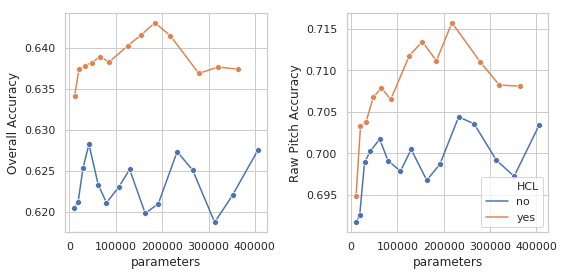

In [9]:
sns.set(rc={'figure.figsize': (8, 4)})
sns.set(style="whitegrid")


name="plugplay"
# split="MedleyDB valid."
split="MedleyDB"
#split=None
plot_metric="Raw Chroma Accuracy"
#plot_metric="Overall Accuracy"
#plot_metric="Raw Pitch Accuracy"
palette="cubehelix"
drop_metrics=["Voicing Accuracy",'Voicing Recall', 'Voicing False Alarm']
figsize=(8, None)
order=None

data = all_data
if split is not None:
    data = all_data[all_data.Dataset==split]

hue = None
# palette = sns.cubehelix_palette(8)
num_bars = len(data.groupby(attr_names))
categories = data[attr_names[0]].unique()

if len(attr_names) > 1:
    hue = attr_names[1]
    categories = data[attr_names[1]].unique()
#     palette = sns.cubehelix_palette(8)

if palette == "cubehelix":
    palette = sns.cubehelix_palette(len(categories)+2)
if figsize[1] is None:
    figsize = (figsize[0], num_bars*0.5)

#sns.set(rc={'figure.figsize': figsize})
sns.set(style="whitegrid")

summary = data.drop(drop_metrics, axis=1).groupby(attr_names).mean().reset_index()
print(summary)

_order = None
if order:
    _order = data.groupby(attr_names).mean().reset_index().sort_values(plot_metric)[attr_names[0]]
#ax = sns.boxplot(x=plot_metric, y=attr_names[0], orient="h", hue=hue, data=data, fliersize=2, palette=palette, showmeans=True, showfliers=False,
#                 meanprops={"markerfacecolor": "black", "markeredgecolor": "black"}, order=_order)
#ax = sns.boxplot(x=attr_names[1], y=plot_metric, hue=attr_names[0], data=data)
fig, axs = plt.subplots(1,2)


ax = sns.lineplot(x=attr_names[1], y="Overall Accuracy", marker="o", hue=attr_names[0], data=summary, ax=axs[0])
ax.get_legend().set_visible(False)

#ax.set_ylim(0.61, 0.65)

ax = sns.lineplot(x=attr_names[1], y="Raw Pitch Accuracy", marker="o", hue=attr_names[0], data=summary, ax=axs[1])
#ax.get_legend().set_visible(False)
#ax.set_ylim(0.69, 0.73)

#ax = sns.lineplot(x=attr_names[1], y="Raw Chroma Accuracy", marker="o", hue=attr_names[0], data=summary, ax=axs[2])
#ax.set_ylim(0.75, 0.79)


plt.tight_layout()

figure = ax.get_figure()
figure.savefig("comparison_melody.pdf", bbox_inches="tight")


if order:
    summary = summary.sort_values(plot_metric)
#to_latex(summary)

In [ ]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.set(style="whitegrid")

# split="MedleyDB valid."
split="MedleyDB"
#split=None
#plot_metric="Raw Chroma Accuracy"
plot_metric="Overall Accuracy"
#plot_metric="Raw Pitch Accuracy"
palette="cubehelix"
drop_metrics=["Voicing Accuracy",'Voicing Recall', 'Voicing False Alarm']
figsize=(8, None)
order=None

data = all_data
if split is not None:
    data = all_data[all_data.Dataset==split]

hue = None
# palette = sns.cubehelix_palette(8)
num_bars = len(data.groupby(attr_names))
categories = data[attr_names[0]].unique()

if len(attr_names) > 1:
    hue = attr_names[1]
    categories = data[attr_names[1]].unique()
#     palette = sns.cubehelix_palette(8)

if palette == "cubehelix":
    palette = sns.cubehelix_palette(len(categories)+2)
if figsize[1] is None:
    figsize = (figsize[0], num_bars*0.5)

#sns.set(rc={'figure.figsize': figsize})
sns.set(style="whitegrid")

summary = data.drop(drop_metrics, axis=1).groupby(attr_names).mean().reset_index()
print(summary)

_order = None
if order:
    _order = data.groupby(attr_names).mean().reset_index().sort_values(plot_metric)[attr_names[0]]
#ax = sns.boxplot(x=plot_metric, y=attr_names[0], orient="h", hue=hue, data=data, fliersize=2, palette=palette, showmeans=True, showfliers=False,
#                 meanprops={"markerfacecolor": "black", "markeredgecolor": "black"}, order=_order)
#ax = sns.boxplot(x=attr_names[1], y=plot_metric, hue=attr_names[0], data=data)
fig, axs = plt.subplots(1,1)

ax = sns.lineplot(x=attr_names[1], y="Overall Accuracy", marker="o", hue=attr_names[0], data=summary, ax=axs)
ax.set_ylim(0.61, 0.65)

plt.tight_layout()

figure = ax.get_figure()
figure.savefig("comparison_melody.pdf", bbox_inches="tight")


if order:
    summary = summary.sort_values(plot_metric)
#to_latex(summary)